***
## DA 320 

#### Assignment: Basics of Loading Data 
#### Student: Natalia Sadkov 
#### Source: base of code provided by Professor Spence - https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Loading%20Data.ipynb
##### Date: October, 26 2022

***


In [12]:
#!/usr/bin/python
#import libraries
import urllib3
import certifi

***
### Retrieve connection from a JSON file 
***

In [13]:
import json

# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('/Users/natasha/Desktop/Fall 2022/DA320/Password MongoDB/credentials.json') as f:
    data = json.load(f)

    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
secret_key = data['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 68 characters in length.


***
### Connect to a MongoDB Server to DA-320 database
***

In [14]:
# I installed 'pip install pymongo' through terminal on my MAC
import pymongo
import certifi
import pandas as pd


# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "DA-320"
da320_database = client['DA-320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 5.0.13.
This database has the collections ['Metacritics', 'imdb']


***
### Fetch imdb collection from a MongoDB Server
***

In [15]:
# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["imdb"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634b797036c53874680c5c86,78492,The Wild Geese,134,6.7,12977,R,6/28/1978,10000000,NULL,NULL,"Action, Adventure, Drama, Thriller, War","Richard Burton, Roger Moore, Richard Harris, H...",Andrew V. McLaglen,"Chris Chrisafis, Erwin C. Dietrich, Euan Lloyd...","Euan Lloyd Productions, Richmond Film Producti..."
1,634b797036c53874680c5c6a,78111,Pretty Baby,110,6.5,10881,TV-MA,1/1/1978,NULL,NULL,NULL,Drama,"Brooke Shields, Keith Carradine, Susan Sarando...",Louis Malle,"Louis Malle, Polly Platt",Paramount Pictures
2,634b797036c53874680c5c62,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
3,634b797036c53874680c5c67,77413,Death on the Nile,140,7.2,34243,PG,6/20/1978,7920000,NULL,784489,"Crime, Drama, Mystery","Peter Ustinov, Jane Birkin, Lois Chiles, Bette...",John Guillermin,"John Brabourne, Richard Goodwin, Norton Knatch...","Mersham Productions Ltd., EMI Films"
4,634b797036c53874680c5c63,77416,The Deer Hunter,183,8.1,334827,R,12/8/1978,15000000,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"


***
### Convert Data - release_date to date, budget to numeric, runtime to numeric
***

In [16]:
# Transform and standardize the columns
imdb.release_date=pd.to_datetime(imdb.release_date,errors = 'coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime=pd.to_numeric(imdb.runtime,errors='coerce')
# cheking result
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634b797036c53874680c5c86,78492,The Wild Geese,134.0,6.7,12977,R,1978-06-28,10000000.0,NULL,NULL,"Action, Adventure, Drama, Thriller, War","Richard Burton, Roger Moore, Richard Harris, H...",Andrew V. McLaglen,"Chris Chrisafis, Erwin C. Dietrich, Euan Lloyd...","Euan Lloyd Productions, Richmond Film Producti..."
1,634b797036c53874680c5c6a,78111,Pretty Baby,110.0,6.5,10881,TV-MA,1978-01-01,NaN,NULL,NULL,Drama,"Brooke Shields, Keith Carradine, Susan Sarando...",Louis Malle,"Louis Malle, Polly Platt",Paramount Pictures
2,634b797036c53874680c5c62,78346,Superman,143.0,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
3,634b797036c53874680c5c67,77413,Death on the Nile,140.0,7.2,34243,PG,1978-06-20,7920000.0,NULL,784489,"Crime, Drama, Mystery","Peter Ustinov, Jane Birkin, Lois Chiles, Bette...",John Guillermin,"John Brabourne, Richard Goodwin, Norton Knatch...","Mersham Productions Ltd., EMI Films"
4,634b797036c53874680c5c63,77416,The Deer Hunter,183.0,8.1,334827,R,1978-12-08,15000000.0,NULL,NULL,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"


***
### Plotting friendly currency numbers
***


In [17]:
from matplotlib import pyplot

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

***
### Plotting Runtime against Release date
***

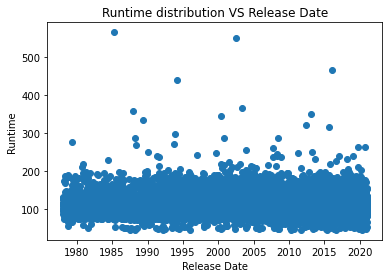

In [18]:
pyplot.title('Runtime distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(imdb['release_date'], imdb['runtime'])
pyplot.show()

***
### Top outliers for Runtime
***

In [19]:
#Identify the top outliers for Runtime
imdb.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
1717,634b797136c53874680c6387,90015,Shoah,566.0,8.7,9396,Not Rated,1985-04-30,NaN,NULL,NULL,"Documentary, History, War","Simon Srebnik, Michael Podchlebnik, Motke Zaïd...",Claude Lanzmann,", , , ,","British Broadcasting Corporation, Historia, Le..."
8717,634b797536c53874680c7ef4,389448,Tie Xi Qu: West of the Tracks,551.0,8.2,1163,NULL,2002-06-21,NaN,NULL,NULL,Documentary,", , , ,",Bing Wang,"Bing Wang, Zhu Zhu","Wang Bing Film Workshop, The Hubert Bals Fund ..."
22601,634b797c36c53874680cb538,5275892,O.J.: Made in America,467.0,8.9,19642,TV-MA,2016-01-22,NaN,NULL,NULL,"Documentary, Biography, Crime, History","Kareem Abdul-Jabbar, Mike Albanese, Muhammad A...",Ezra Edelman,"John Dahl, Ryan Dilts, Ezra Edelman, Cristina ...","ESPN Films, Laylow Films"
4907,634b797336c53874680c6f2f,111341,Satantango,439.0,8.3,10916,Not Rated,1994-02-08,NaN,NULL,NULL,Drama,"Mihály Vig, Putyi Horváth, László feLugossy, É...",Béla Tarr,"György Fehér, Joachim von Vietinghoff, Ruth Wa...","Mozgókép Innovációs Társulás és Alapítvány, Vo..."
9181,634b797536c53874680c8098,346336,The Best of Youth,366.0,8.5,21923,R::(part 1),2003-05-20,NaN,NULL,2799773,"Drama, Romance","Luigi Lo Cascio, Alessio Boni, Adriana Asti, S...",Marco Tullio Giordana,"Angelo Barbagallo, Gianfranco Barbagallo, Dona...","BiBi Film, Rai Fiction, Film Commission Torino..."


***
### Plotting Budget against Release date
***

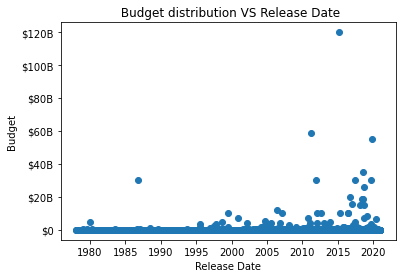

In [20]:



pyplot.title(' Budget distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

***
### Top outliers for Budget
***

In [21]:
imdb.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
21506,634b797b36c53874680cb098,3921314,Muhammad: The Messenger of God,162.0,7.2,10764,NULL,2015-02-01,1.200000e+11,NULL,NULL,"Biography, Drama, History","Mahdi Pakdel, Sareh Bayat, Mina Sadati, Ali Re...",Majid Majidi,"Muhammad Mehdi Heidarian, Majid Majidi, Farzad...",Nourtaban Film Industry
17077,634b797936c53874680ca047,3131744,Deportees 3,112.0,2.4,1631,NaN,2011-03-17,5.900000e+10,NULL,NULL,"Action, Comedy, Drama","Akbar Abdi, Armin Alavi, Kamand Amirsoleimani,...",Masoud Dehnamaki,"Saeed Bagheri, Masoud Dehnamaki, Mohamad Reza ...",", , , ,"
28068,634b797e36c53874680ccaaf,11296132,The Singer,107.0,4.5,1594,NaN,2019-11-06,5.500000e+10,NULL,NULL,"Comedy, Drama, Music, Romance","Ziba Hajian, Parviz Parastui, Elnaz Shakerdoos...",Mostafa Kiayee,"Shahin Fardtombekiyan, Mostafa Kiayee","Filmiran, HA International, Karen Film"
25786,634b797d36c53874680cc1dd,8116428,Along With the Gods: The Last 49 Days,142.0,7.1,7171,Not Rated,2018-08-01,3.500000e+10,NULL,NULL,"Action, Drama, Fantasy","Ha Jung-woo, Ju Ji-Hoon, Hyang-gi Kim, Ma Dong...",Yong-hwa Kim,"Ji-sun Choi, Won Dong-Yeon, Yong-hwa Kim, Daes...","Dexter Studios, Realies Pictures"
1579,634b797136c53874680c6413,91605,The Name of the Rose,130.0,7.7,107935,R,1986-09-24,3.000000e+10,NULL,77200000,"Drama, History, Mystery, Thriller","Sean Connery, Christian Slater, Helmut Qualtin...",Jean-Jacques Annaud,"Franco Cristaldi, Jake Eberts, Bernd Eichinger...","Constantin Film, Cristaldifilm, Les Films Aria..."


***
### Suggestions:
#### For runtime some outlaners reflects that it is episodes of movies combined together, other just realy long documnetary movies, adding filter that will allowe to check for episodes and for movie type can help to identify real outliers
#### For budget I will suggest to add filter on Currency Code, fetch it and made additional field, what will allow to make convertation according to year of release in the USA dollar for proper budget comparison.
***